In [51]:
import torch
import pandas as pd
import numpy as np
from torch import tensor
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch import nn, from_numpy, optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt 

In [52]:
df = pd.read_csv('kr-vs-kp.data', header=None)
df.columns = ['bkblk','bknwy','bkon8','bkona','bkspr','bkxbq','bkxcr','bkxwp','blxwp','bxqsq','cntxt','dsopp','dwipd',
 'hdchk','katri','mulch','qxmsq','r2ar8','reskd','reskr','rimmx','rkxwp','rxmsq','simpl','skach','skewr',
 'skrxp','spcop','stlmt','thrsk','wkcti','wkna8','wknck','wkovl','wkpos','wtoeg', 'class']

column = ['bkblk','bknwy','bkon8','bkona','bkspr','bkxbq','bkxcr','bkxwp','blxwp','bxqsq','cntxt','dsopp','dwipd',
 'hdchk','katri','mulch','qxmsq','r2ar8','reskd','reskr','rimmx','rkxwp','rxmsq','simpl','skach','skewr',
 'skrxp','spcop','stlmt','thrsk','wkcti','wkna8','wknck','wkovl','wkpos','wtoeg', 'class']

df.head(10)
#df.shape

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,class
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
5,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won
6,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
7,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
8,f,f,f,f,f,f,f,f,f,f,...,f,f,f,t,f,f,t,t,n,won
9,f,f,f,f,f,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [53]:
for category in column:
    df[category] = df[category].astype('category')
    
encode_map_tf = {
    't': 1,
    'f': 0
}

encode_map_lg = {
    'l' : 0,
    'g' : 1
}

encode_map_nbw = {
    'n' : 0,
    'b' : 1,
    'w' : 2
}

encode_map_target = {
    'nowin' : 0,
    'won' : 1
}

encode_map_tn = {
    'n' : 0,
    't' : 1
}


# df['class'] = df['class'].astype('category')
encode_map = {
    't': 1,
    'n': 0
}

for category in column:
    if category == 'class':
        df['class'].replace(encode_map_target, inplace=True)
    elif category == 'katri':
        df['katri'].replace(encode_map_nbw, inplace=True)
    elif category == 'wtoeg':
        df['wtoeg'].replace(encode_map_tn, inplace=True)
    elif category == 'dwipd':
        df['dwipd'].replace(encode_map_lg, inplace=True)
    else:
        df[category].replace(encode_map_tf, inplace=True)
        
for category in column:
    df[category] = df[category].astype('category')   
    
d = {}

for i in column:
     d[i] = df[i].cat.categories
     d[i] = df[i].cat.codes.values


In [54]:
dataset = np.stack((d['bkblk'], d['bknwy'], d['bkon8'], d['bkona'], d['bkspr'], d['bkxbq'], d['bkxcr'], d['bkxwp'], d['blxwp'], d['bxqsq'], d['cntxt'], d['dsopp'], d['dwipd'], d['hdchk'], d['katri'], d['mulch'], d['qxmsq'], d['r2ar8'], d['reskd'], d['reskr'], d['rimmx'], d['rkxwp'], d['rxmsq'], d['simpl'], d['skach'], d['skewr'], d['skrxp'], d['spcop'], d['stlmt'], d['thrsk'], d['wkcti'], d['wkna8'], d['wknck'], d['wkovl'], d['wkpos'], d['wtoeg'], d['class']), 1)
dataset.shape

y = dataset[:, -1] # for last column
x = dataset[:, :-1] # for all but last column

y1 = np.reshape(y, (-1, 1))
y_data = torch.FloatTensor(y1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

y_train = np.reshape(y_train, (-1, 1))
y_data = torch.FloatTensor(y_train)
print(y_data.shape)
x_data = torch.FloatTensor(x_train)
print(x_data.shape)

x_data_test = torch.FloatTensor(x_test)
y_test = np.reshape(y_test, (- 1, 1))
y_data_test = torch.FloatTensor(y_test)
print(x_data_test.shape)
print(y_data_test.shape)

torch.Size([2141, 1])
torch.Size([2141, 36])
torch.Size([1055, 36])
torch.Size([1055, 1])


In [55]:
class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = nn.Linear(36, 1)  # Thirty six in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data.
        """
        y_pred = sigmoid(self.linear(x))
        return y_pred


model = Model()

criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
def training_loop(epoch_value = 100):
    for epoch in range(epoch_value):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(x_data)

        # Compute and print loss
        loss = criterion(y_pred, y_data)

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    prediction = model(x_data_test)
    prediction_list = []
    gt_list = []
    for i in prediction:
        if i >= 0.5:
            prediction_list.append(1)
        elif i < 0.5:
            prediction_list.append(0)

    for i in y_data_test:
        if i == 1:
            gt_list.append(1)
        elif i == 0:
            gt_list.append(0)

    # print(len(gt_list))
    # print(len(prediction_list))

    assert len(gt_list) == len(prediction_list)

    check = 0

    for i in range(len(gt_list)):
        if prediction_list[i] == gt_list[i]:
            check = check + 1
        else:
            continue

    print("accuracy: ", (check / len(gt_list)) * 100, "%")
    return (check / len(gt_list)) * 100

In [56]:
results = []
epochs = [100, 500, 1000, 10000, 100000]
for i in [100, 500, 1000, 10000, 100000]:
    result = training_loop(i)
    results.append(result)
    print("epoch: ", i)
    

accuracy:  55.63981042654028 %
epoch:  100
accuracy:  84.45497630331754 %
epoch:  500
accuracy:  88.15165876777252 %
epoch:  1000
accuracy:  92.79620853080569 %
epoch:  10000
accuracy:  94.88151658767772 %
epoch:  100000


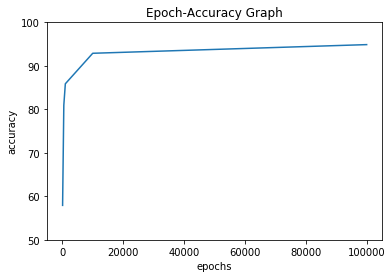

In [38]:
plt.plot(epochs, results)
plt.plot(x, y) 
plt.ylim([50, 100])  
plt.xlabel('epochs') 
plt.ylabel('accuracy') 
plt.title('Epoch-Accuracy Graph')  
plt.show() 